In [49]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read in the data

df = pd.read_csv(r'C:\Users\K--St\OneDrive\Desktop\Data Analytics\Porfolio\Python Project 4\movies.csv')

In [50]:
df = df.dropna()

In [51]:
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [9]:
# Looking at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  yearcorrect  
0   46998772.0        Warner Bros.    146.0         1980  
1   58853106.0   Columbia Pictures    104.0         1980  
2  538375067.0           Lucasfilm    124.0         1980  
3   83453539.0  Paramount Pictures     88.0         1980  
4   39846344.0      Orion Pictures     98.0         1980

In [10]:
# Looking for missing data in the set

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
yearcorrect - 0.0%


In [11]:
# Data types for the columns

df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
yearcorrect      int32
dtype: object

In [52]:
#change data type of columns

df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [53]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  yearcorrect  
0   46998772        Warner Bros.    146.0         1980  
1   58853106   Columbia Pictures    104.0         1980  
2  538375067           Lucasfilm    124.0         1980  
3   83453539  Paramount Pictures     88.0         1980  
4   39846344      Orion Pictures     98.0         1980

In [15]:
df.tail()

name     rating      genre  year  \
7648     Bad Boys for Life          R     Action  2020   
7649    Sonic the Hedgehog         PG     Action  2020   
7650              Dolittle         PG  Adventure  2020   
7651  The Call of the Wild         PG  Adventure  2020   
7652     The Eight Hundred  Not Rated     Action  2020   

                               released  score   votes        director  \
7648   January 17, 2020 (United States)    6.6  140000    Adil El Arbi   
7649  February 14, 2020 (United States)    6.5  102000     Jeff Fowler   
7650   January 17, 2020 (United States)    5.6   53000  Stephen Gaghan   
7651  February 21, 2020 (United States)    6.8   42000   Chris Sanders   
7652    August 28, 2020 (United States)    6.8    3700         Hu Guan   

              writer               star        country     budget      gross  \
7648     Peter Craig         Will Smith  United States   90000000  426505244   
7649       Pat Casey       Ben Schwartz  United States   85000000  319715683   
7650  Stephen Gaghan  Robert Downey Jr.  United States  175000000  245487753   
7651   Michael Green      Harrison Ford         Canada  135000000  111105497   
7652         Hu Guan    Zhi-zhong Huang          China   80000000  461421559   

                                  company  runtime  yearcorrect  
7648                    Columbia Pictures    124.0         2020  
7649                   Paramount Pictures     99.0         2020  
7650                   Universal Pictures    101.0         2020  
7651                 20th Century Studios    100.0         2020  
7652  Beijing Diqi Yinxiang Entertainment    149.0         2020

In [16]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
5640                                 Tanner Hall          R   Drama  2009   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score    votes             director  \
5445  December 18, 2009 (United States)    7.8  1100000        James Cameron   
7445     April 26, 2019 (United States)    8.4   903000        Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000        James Cameron   
6663  December 18, 2015 (United States)    7.8   876000          J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000        Anthony Russo   
...                                 ...    ...      ...                  ...   
5640          January 15, 2015 (Sweden)    5.8     3500  Francesca Gregorini   
2434         June 4, 1994 (South Korea)    4.5     1900     Stephen Cornwell   
3681              May 11, 2001 (Canada)    6.8    43000         John Fawcett   
272      March 12, 1982 (United States)    3.9     2300         Charles Band   
3203           October 1, 1997 (Brazil)    5.7     5800         George Huang   

                       writer               star        country     budget  \
5445            James Cameron    Sam Worthington  United States  237000000   
7445       Christopher Markus  Robert Downey Jr.  United States  356000000   
3045            James Cameron  Leonardo DiCaprio  United States  200000000   
6663          Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244       Christopher Markus  Robert Downey Jr.  United States  321000000   
...                       ...                ...            ...        ...   
5640  Tatiana von Fürstenberg        Rooney Mara  United States    3000000   
2434       Wallace C. Bennett       Brad Johnson  United States    5000000   
3681             Karen Walton      Emily Perkins         Canada    5000000   
272             Alan J. Adler    Robert Glaudini  United States     800000   
3203                Andy Burg       Will Friedle  United States   15000000   

           gross                    company  runtime  yearcorrect  
5445  2847246203      Twentieth Century Fox    162.0         2009  
7445  2797501328             Marvel Studios    181.0         2019  
3045  2201647264      Twentieth Century Fox    194.0         1997  
6663  2069521700                  Lucasfilm    138.0         2015  
7244  2048359754             Marvel Studios    149.0         2018  
...          ...                        ...      ...          ...  
5640        5073           Two Prong Lesson     96.0         2015  
2434        2970           Trimark Pictures     97.0         1994  
3681        2554  Copperheart Entertainment    108.0         2001  
272         2270           Embassy Pictures     85.0         1982  
3203         309                   Daybreak     85.0         1997  

[5421 rows x 16 columns]

In [21]:
# change options to view all rows

pd.set_option('display.max_rows', None)

In [62]:
dfsort = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [55]:
# Checking for duplicates

dfsort['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

<function matplotlib.pyplot.show(close=None, block=None)>

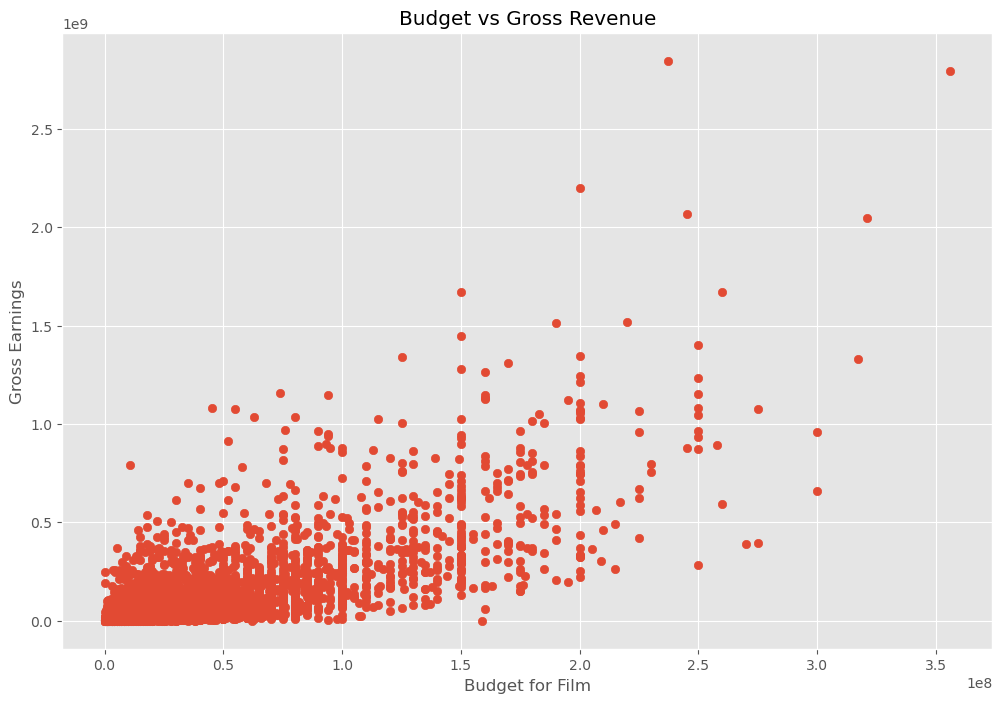

In [56]:
# building a scatter plot to compare budget and gross revenue

plt.scatter(x = dfsort['budget'], y = dfsort['gross'])

plt.title('Budget vs Gross Revenue')

plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

plt.show

In [57]:
dfsort.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0         2009  
7445  2797501328         Marvel Studios    181.0         2019  
3045  2201647264  Twentieth Century Fox    194.0         1997  
6663  2069521700              Lucasfilm    138.0         2015  
7244  2048359754         Marvel Studios    149.0         2018

<AxesSubplot:xlabel='budget', ylabel='gross'>

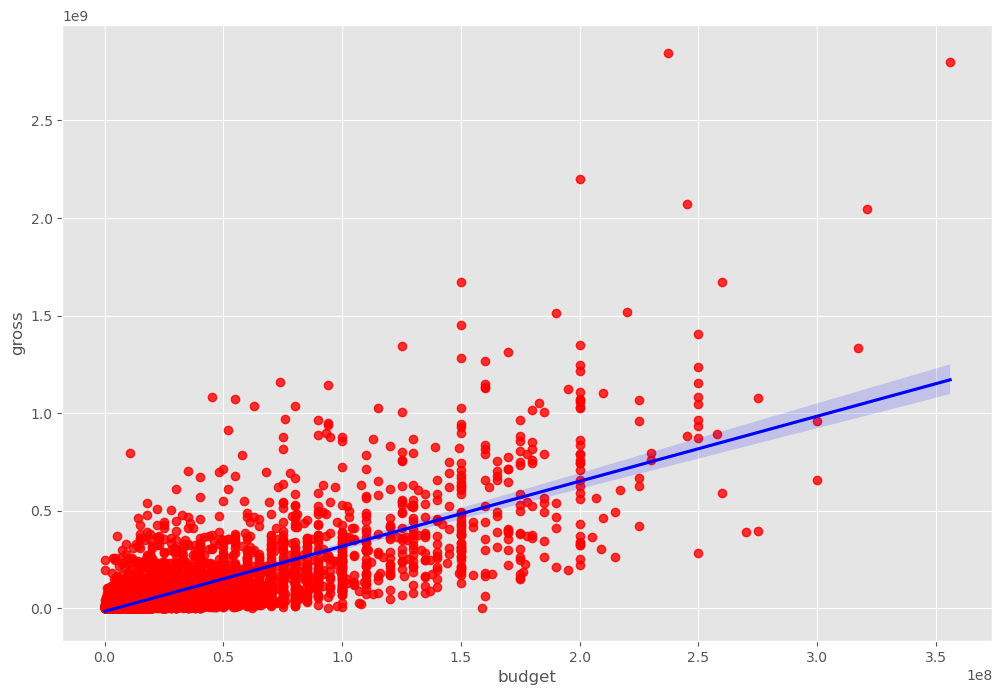

In [58]:
# plot budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = dfsort, scatter_kws={"color": "red"},line_kws={"color":"blue"})

In [33]:
# Correlations

In [39]:
df.corr(method = 'spearman')

year     score     votes    budget     gross   runtime  \
year         1.000000  0.057741  0.427623  0.312886  0.351045  0.095444   
score        0.057741  1.000000  0.495409 -0.009971  0.183192  0.412155   
votes        0.427623  0.495409  1.000000  0.493461  0.745793  0.300621   
budget       0.312886 -0.009971  0.493461  1.000000  0.692958  0.330794   
gross        0.351045  0.183192  0.745793  0.692958  1.000000  0.257400   
runtime      0.095444  0.412155  0.300621  0.330794  0.257400  1.000000   
yearcorrect  0.998694  0.063674  0.422988  0.302535  0.340529  0.095507   

             yearcorrect  
year            0.998694  
score           0.063674  
votes           0.422988  
budget          0.302535  
gross           0.340529  
runtime         0.095507  
yearcorrect     1.000000

In [37]:
df.corr(method='kendall')

year     score     votes    budget     gross   runtime  \
year         1.000000  0.039389  0.296512  0.220833  0.239539  0.064824   
score        0.039389  1.000000  0.350185 -0.006406  0.124943  0.292254   
votes        0.296512  0.350185  1.000000  0.346274  0.553625  0.205344   
budget       0.220833 -0.006406  0.346274  1.000000  0.512057  0.231278   
gross        0.239539  0.124943  0.553625  0.512057  1.000000  0.176979   
runtime      0.064824  0.292254  0.205344  0.231278  0.176979  1.000000   
yearcorrect  0.991304  0.043400  0.293044  0.213719  0.232372  0.064793   

             yearcorrect  
year            0.991304  
score           0.043400  
votes           0.293044  
budget          0.213719  
gross           0.232372  
runtime         0.064793  
yearcorrect     1.000000

In [41]:
df.corr()

year     score     votes    budget     gross   runtime  \
year         1.000000  0.056386  0.206021  0.327722  0.274321  0.075077   
score        0.056386  1.000000  0.474256  0.072001  0.222556  0.414068   
votes        0.206021  0.474256  1.000000  0.439675  0.614751  0.352303   
budget       0.327722  0.072001  0.439675  1.000000  0.740247  0.318695   
gross        0.274321  0.222556  0.614751  0.740247  1.000000  0.275796   
runtime      0.075077  0.414068  0.352303  0.318695  0.275796  1.000000   
yearcorrect  0.998726  0.061923  0.203098  0.320312  0.268721  0.075294   

             yearcorrect  
year            0.998726  
score           0.061923  
votes           0.203098  
budget          0.320312  
gross           0.268721  
runtime         0.075294  
yearcorrect     1.000000

In [42]:
corr_matrix = df.corr(method='pearson')

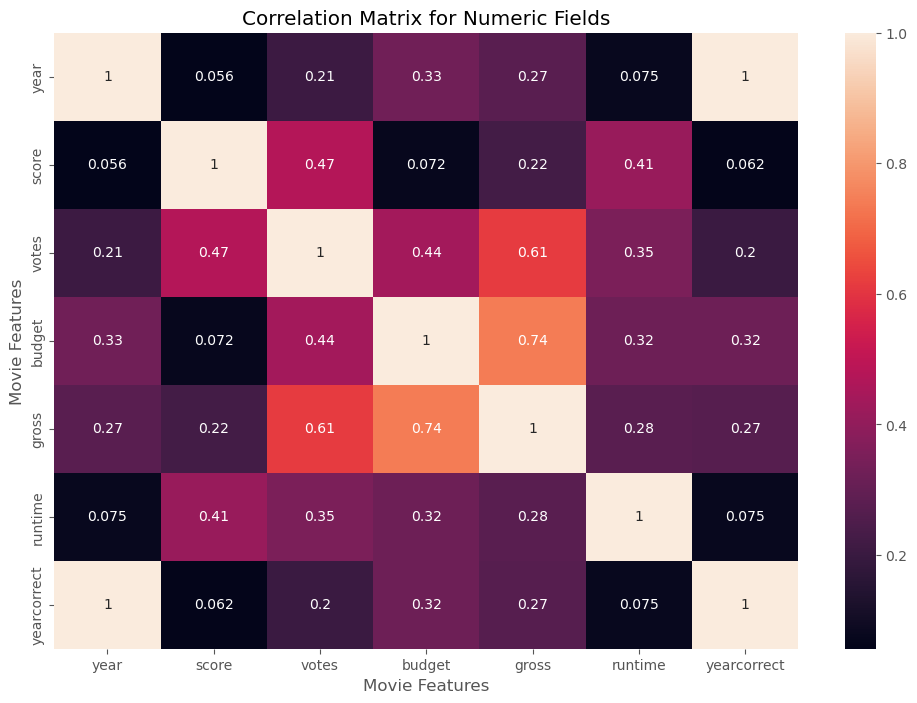

In [44]:
sns.heatmap(corr_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Fields')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [45]:
# correlation for company (reputation)

In [66]:
# convert strings to number representations

df_num = dfsort

for col_name in df_num.columns:
    if(df_num[col_name].dtype == 'object'):
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes
        
df_num

name  rating  genre  year  released  score    votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000       785    1263   
7445   388       5      0  2019       137    8.4   903000       105     513   
3045  4909       5      6  1997       534    7.8  1100000       785    1263   
6663  3643       5      0  2015       529    7.8   876000       768    1806   
7244   389       5      0  2018       145    8.4   897000       105     513   
7480  4388       4      2  2019      1126    6.9   222000      1012    1361   
6653  2117       5      0  2015      1303    7.0   593000       335    2523   
6043  3878       5      0  2012      1899    8.0  1300000      1060    1646   
6646  1541       5      0  2015       165    7.1   370000       809     481   
7494  1530       4      2  2019      2053    6.8   148000       277    1383   
6644   387       5      0  2015      1712    7.3   777000      1060    1646   
7247   567       5      0  2018       723    7.3   661000      1716    2687   
5845  1731       5      1  2011      1092    8.1   790000       452    2862   
7075  3644       5      0  2017       500    7.0   581000      1589    2487   
7271  2118       5      0  2018      1384    6.2   277000       764     777   
6262  1529       4      2  2013      2082    7.4   585000       277    1383   
7072   477       4      7  2017      1561    7.1   283000       155    2822   
7281  1966       4      2  2018      1325    7.6   263000       193     327   
7055  4119       5      0  2017        45    6.6   214000       567    1013   
6244  2014       5      0  2013      1881    7.1   779000      1767     837   
6688  2545       4      2  2015      1050    6.4   218000      1144     362   
6846   750       5      0  2016      1910    7.8   694000       105     513   
7250   343       5      0  2018       565    6.9   404000       809     699   
4245  4407       5      0  2003       516    8.9  1700000      1520    1238   
7458  3595       5      0  2019      1136    7.5   359000      1019     479   
7456   755       5      0  2019      1697    6.8   478000        96     182   
5878  4950       5      0  2011      1442    6.2   390000      1302     886   
6059  3498       5      0  2012      2148    7.7   642000      1732    2221   
6494  4949       5      0  2014      1424    5.6   302000      1302     886   
2448  4388       1      2  1994      1394    8.5   970000      1685    1206   
6047  4048       5      0  2012      1144    8.4  1600000       317    1606   
7463  3640       5      0  2019       553    6.5   394000       768     489   
7450  2091       6      5  2019      2321    8.4  1000000      1937    2998   
7488  4936       1      2  2019      1372    7.7   217000      1052    1525   
5685  4935       1      2  2010      1345    8.2   776000      1162    1525   
4852  2985       5      0  2006      1255    7.3   668000       674    2927   
6869  3260       5      0  2016       509    7.8   572000       615     492   
7481   206       4      1  2019      1837    6.9   239000       705    1468   
5860  2988       5      0  2011      1803    6.6   492000      1635    2927   
7140  1102       4      2  2017      1464    6.3   119000      1144     524   
2245  2115       5      0  1993      1292    8.1   894000      1859    2070   
6908  1411       4      2  2016      1339    7.3   250000        81     153   
3451  3637       4      0  1999      1778    6.5   748000       653    1046   
5667   215       4      1  2010      1679    6.4   392000      1918    1849   
6863  5329       4      2  2016      1673    8.0   450000       239     390   
6045  4240       5      1  2012       492    7.8   773000      1520     967   
3843  1736       4      1  2001      1987    7.6   685000       280    1236   
5243  4047       5      0  2008      1116    9.0  2400000       317    1606   
6311  1101       4      2  2013      1218    7.3   377000      1556     524   
6905  4322       4      1  2016        53    7.4   26400

In [65]:
dfsort.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0         2009  
7445  2797501328         Marvel Studios    181.0         2019  
3045  2201647264  Twentieth Century Fox    194.0         1997  
6663  2069521700              Lucasfilm    138.0         2015  
7244  2048359754         Marvel Studios    149.0         2018

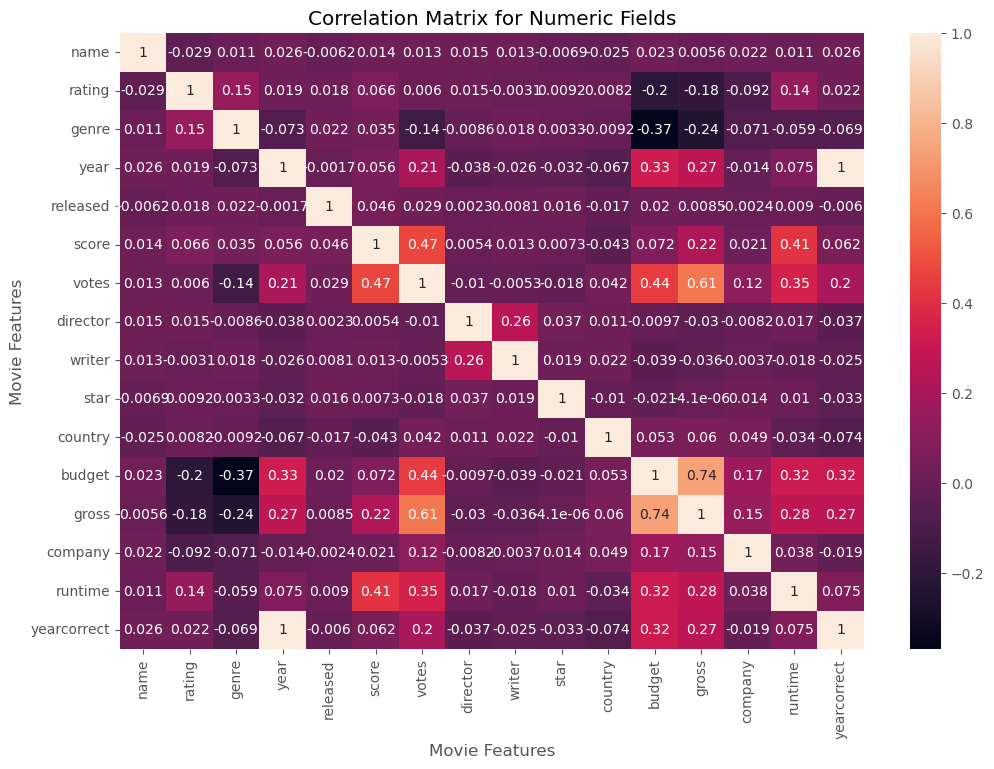

In [67]:
corr_matrix = df_num.corr(method='pearson')

sns.heatmap(corr_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Fields')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [68]:
df_num.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating      -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre        0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year         0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released    -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score        0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes        0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director     0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer       0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star        -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country     -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget       0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
gross        0.005639 -0.181906 -0.244101  0.274321  0.008501  0.222556   
company      0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime      0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   
yearcorrect  0.025542  0.022021 -0.069147  0.998726 -0.005989  0.061923   

                votes  director    writer      star   country    budget  \
name         0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating       0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre       -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year         0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released     0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952   
score        0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes        1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director    -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer      -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star        -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country      0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget       0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
gross        0.614751 -0.029560 -0.035885 -0.000004  0.060078  0.740247   
company      0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime      0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   
yearcorrect  0.203098 -0.037371 -0.025495 -0.032687 -0.073569  0.320312   

                gross   company   runtime  yearcorrect  
name         0.005639  0.021697  0.010850     0.025542  
rating      -0.181906 -0.092357  0.140792     0.022021  
genre       -0.244101 -0.071334 -0.059237    -0.069147  
year         0.274321 -0.014333  0.075077     0.998726  
released     0.008501 -0.002407  0.008975    -0.005989  
score        0.222556  0.020656  0.414068     0.061923  
votes        0.614751  0.118470  0.352303     0.203098  
director    -0.029560 -0.008223  0.017433    -0.037371  
writer      -0.035885 -0.003697 -0.017561    -0.025495  
star        -0.000004  0.014082  0.010108    -0.032687  
country      0.060078  0.048569 -0.034477    -0.073569  
budget       0.740247  0.170235  0.318695     0.320312  
gross        1.000000  0.149553  0.275796     0.268721  
company      0.149553  1.000000  0.037585    -0.018806  
runtime      0.275796  0.037585  1.000000     0.075294  
yearcorrect  0.268721 -0.018806  0.075294     1.000000

In [69]:
corr_matrix = df_num.corr()

corr_pairs = corr_matrix.unstack()

corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.025542
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [70]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
genre        yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [71]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# votes and budget have the highest correlation to gross earnings

# company has low correlation